<a href="https://colab.research.google.com/github/ladannasiba/COVID-19-DATASET-3MTT-CAPSTONE-PROJECT-/blob/main/Covid_19_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload the 'covid_19_clean_complete.csv' file.


Saving covid_19_clean_complete.csv to covid_19_clean_complete (1).csv

Checking for missing values...
Province/State    34404
dtype: int64

Performing Exploratory Data Analysis...


<ipython-input-4-511d31cb1d89>:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


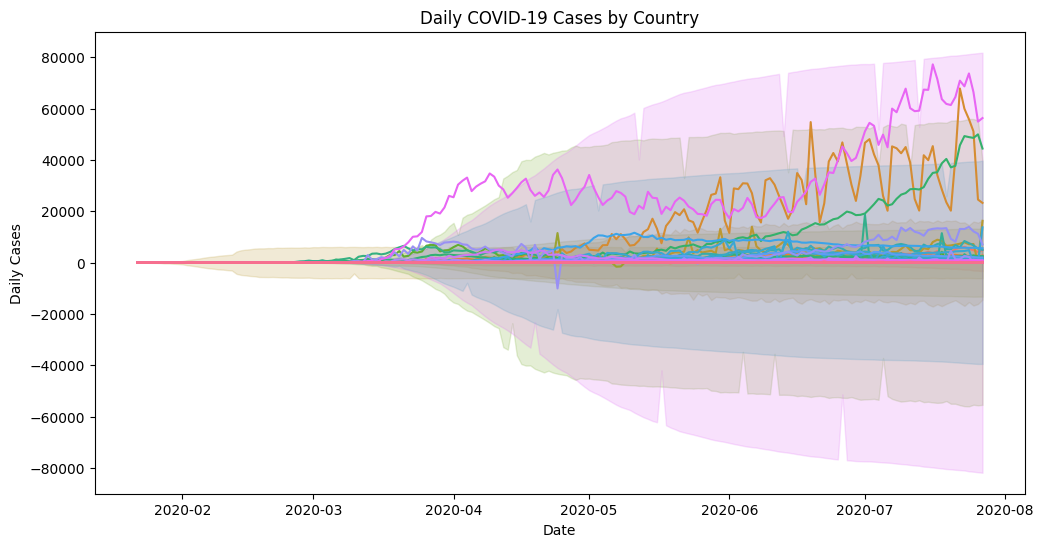

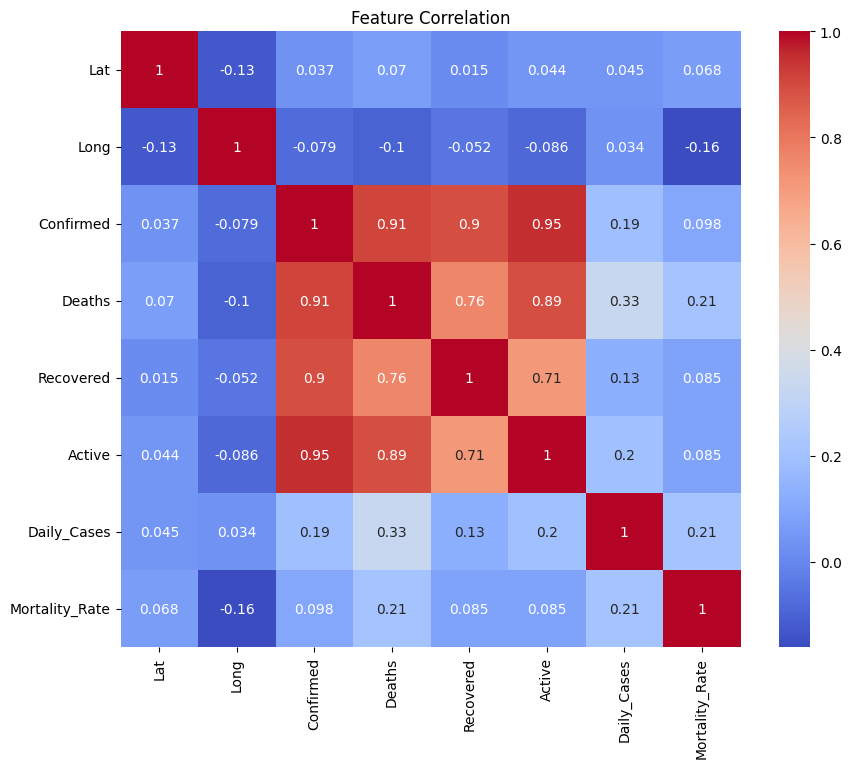


Preparing data for model training...

Training the predictive model...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Root Mean Squared Error (RMSE): 58692.752150603104


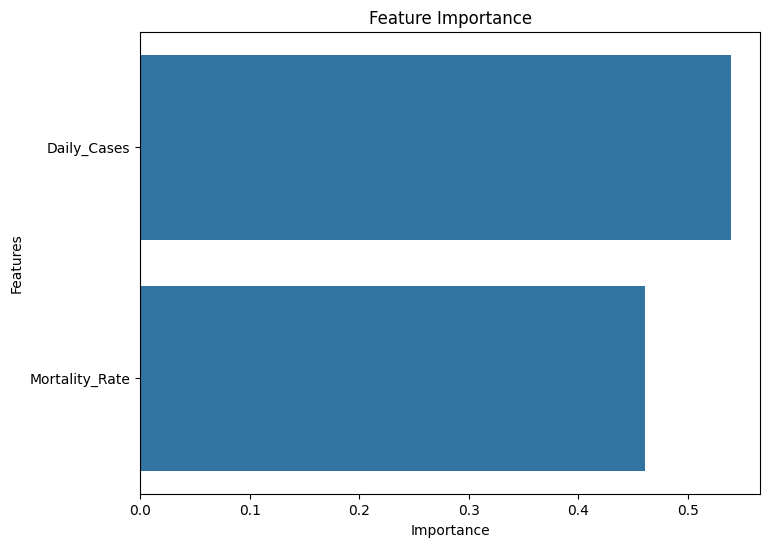

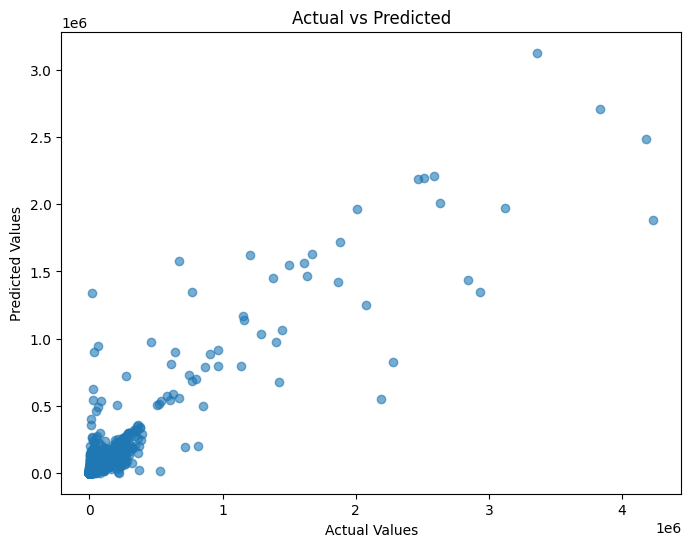


Cleaned data saved as 'cleaned_covid_data.csv'.


In [4]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Upload the Dataset
print("Please upload the 'covid_19_clean_complete.csv' file.")
uploaded = files.upload()

# Load the Dataset
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Step 2: Data Preprocessing
# Checking for missing values
print("\nChecking for missing values...")
missing = data.isnull().sum()
print(missing[missing > 0])

# Handling missing values
data.fillna(method='ffill', inplace=True)

# Removing duplicates
data.drop_duplicates(inplace=True)

# Standardizing date format
data['Date'] = pd.to_datetime(data['Date'])

# Creating new features
data['Daily_Cases'] = data.groupby('Country/Region')['Confirmed'].diff().fillna(0)
data['Mortality_Rate'] = data['Deaths'] / (data['Confirmed'] + 1e-5)

# Step 3: Exploratory Data Analysis (EDA)
print("\nPerforming Exploratory Data Analysis...")

# Line Plot: Daily Cases Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Daily_Cases', hue='Country/Region', legend=False)
plt.title('Daily COVID-19 Cases by Country')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.show()

# Correlation Heatmap
numerical_data = data.select_dtypes(include=np.number)  # Select numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Step 4: Model Development
# Selecting features and target variable
print("\nPreparing data for model training...")
features = ['Daily_Cases', 'Mortality_Rate']
target = 'Confirmed'
X = data[features]
y = data[target]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Regressor
print("\nTraining the predictive model...")
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Step 5: Visualization of Model Results
# Feature Importance
importances = model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Predicted vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

# Step 6: Save Cleaned Data and Results
cleaned_file_name = 'cleaned_covid_data.csv'
data.to_csv(cleaned_file_name, index=False)
print(f"\nCleaned data saved as '{cleaned_file_name}'.")
